In [1]:
%pip install seaborn 


In [2]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [4]:
df=pd.read_csv("Employee.csv")

In [5]:
print(df.head())

   Education  JoiningYear       City  PaymentTier  Age  Gender EverBenched  \
0  Bachelors         2017  Bangalore            3   34    Male          No   
1  Bachelors         2013       Pune            1   28  Female          No   
2  Bachelors         2014  New Delhi            3   38  Female          No   
3    Masters         2016  Bangalore            3   27    Male          No   
4    Masters         2017       Pune            3   24    Male         Yes   

   ExperienceInCurrentDomain  LeaveOrNot  
0                          0           0  
1                          3           1  
2                          2           0  
3                          5           1  
4                          2           1  


In [6]:
print(df.isnull().sum())

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64


In [7]:
df.describe(include="all")

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
count,4653,4653.000000,4653,4653.000000,4653.000000,4653,4653,4653.000000,4653.000000
unique,3,NaN,3,NaN,NaN,2,2,NaN,NaN
top,Bachelors,NaN,Bangalore,NaN,NaN,Male,No,NaN,NaN
freq,3601,NaN,2228,NaN,NaN,2778,4175,NaN,NaN
mean,NaN,2015.062970,NaN,2.698259,29.393295,NaN,NaN,2.905652,0.343864
std,NaN,1.863377,NaN,0.561435,4.826087,NaN,NaN,1.558240,0.475047
min,NaN,2012.000000,NaN,1.000000,22.000000,NaN,NaN,0.000000,0.000000
25%,NaN,2013.000000,NaN,3.000000,26.000000,NaN,NaN,2.000000,0.000000
50%,NaN,2015.000000,NaN,3.000000,28.000000,NaN,NaN,3.000000,0.000000
75%,NaN,2017.000000,NaN,3.000000,32.000000,NaN,NaN,4.000000,1.000000


In [8]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [9]:
descriptions={
'Education':'1',                    
'JoiningYear':'1',                  
'City':'1',                         
'PaymentTier':'1',                  
'Age ':'1',                         
'Gender':'1',                       
'EverBenched':'1',                  
'ExperienceInCurrentDomain ':'1',   
'LeaveOrNot':'1'       
}
print("\nVariable descriptions")
for var , desc in descriptions.items():
    print(f"{var} : {desc}")


Variable descriptions
Education : 1
JoiningYear : 1
City : 1
PaymentTier : 1
Age  : 1
Gender : 1
EverBenched : 1
ExperienceInCurrentDomain  : 1
LeaveOrNot : 1


In [10]:
df.dtypes

Education                    object
JoiningYear                   int64
City                         object
PaymentTier                   int64
Age                           int64
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain     int64
LeaveOrNot                    int64
dtype: object

In [11]:
print("\ndataset dimention(rows,columns)")
print(df.shape)


dataset dimention(rows,columns)
(4653, 9)


In [12]:
df['PaymentTier'] = df['PaymentTier'].astype('Int64')


In [13]:
df.dtypes

Education                    object
JoiningYear                   int64
City                         object
PaymentTier                   Int64
Age                           int64
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain     int64
LeaveOrNot                    int64
dtype: object

In [14]:
df['Gender'] = df['Gender'].astype('category')

In [15]:
df.dtypes

Education                      object
JoiningYear                     int64
City                           object
PaymentTier                     Int64
Age                             int64
Gender                       category
EverBenched                    object
ExperienceInCurrentDomain       int64
LeaveOrNot                      int64
dtype: object


Normalized(Z-score)
      Age  Age_zscore
0      34    0.954543
1      28   -0.288701
2      38    1.783371
3      27   -0.495908
4      24   -1.117530
...   ...         ...
4648   26   -0.703115
4649   37    1.576164
4650   27   -0.495908
4651   30    0.125714
4652   33    0.747335

[4653 rows x 2 columns]


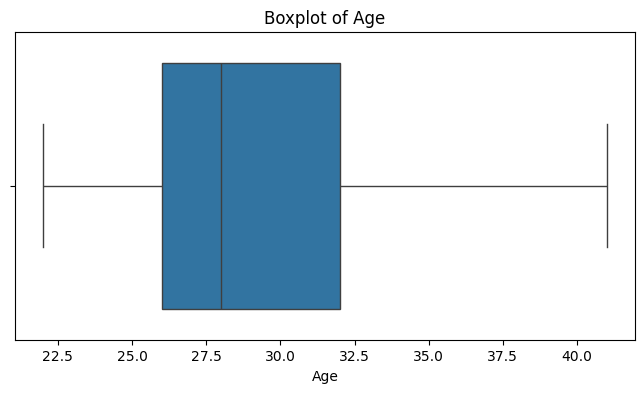

In [17]:
df["Age_zscore"] = (df['Age'] - df['Age'].mean()) / df['Age'].std()
print("\nNormalized(Z-score)")
print(df[['Age','Age_zscore']])
plt.figure(figsize =(8,4))
sns.boxplot(x=df['Age'])
plt.title("Boxplot of Age")
plt.show()